IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Souleymane MBAYE

Ce projet peut être fait (c'est même recommandé) en binôme. Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - mars 2022


<font size="+1" color="RED"><b>Date de rendu : vendredi 25 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur:
- les données Bases_IADS : cela correspond à un problème de classification binaire
- les données Bases_IADS_multiclasses : cela correspond à un problème de classification multiclasses

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivantes:

          -- ce_notebook.ipynb
          -- Bases_IADS/ 
              -- README.txt
              -- train.csv
              -- test.csv
              -- eval.csv
              -- names.csv
          -- Bases_IADS_multiclasses/
              -- README.txt
              -- train_multi.csv
              -- test_multi.csv
              -- eval_multi.csv
              -- names_multi.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.


Les fichiers de chaque répertoire correspondent à:
- fichier README.txt : donne des explications sur le contenu du répertoire
- fichier train*.csv : base d'apprentissage à utiliser pour construire le classfieur
- fichier test*.csv : base de test pour évaluer vous même le classifieur construit. Les exemples de ce fichier NE DOIVENT PAS être utilisés pour l'apprentissage du classifieur.
- fichier eval*.csv : fichier d'évaluation du classifieur (voir ci-dessous).

## Travail à faire

Pour chaque ensemble de données:
- les 2 algorithmes d'apprentissage knn et perceptron doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations pourront être : comparaison des taux de bonne classification apprentissage / test (avec validation croisée), visualisation, etc.
- de plus, un fichier `eval.csv` est fourni. Ce fichier contient des descriptions associées à un "faux" label. Dans votre compte-rendu, vous devez fournir un fichier CSV qui donne, pour chaque exemple du fichier `eval.csv`la classe trouvée par votre meilleur classifieur. Ainsi, le fichier CSV à rendre doit comporter 2 colonnes et autant de lignes que d'exemples (une ligne par exemple du fichier eval):<br>
            IDENTIFIANT;CLASSE_TROUVEE_POUR_CET_EXEMPLE
            ...
Le résultat de classification vous sera donné en retour (nous connaissons la vraie classe des exemples de ce fichier...).

Vos **expérimentations doivent être expliquées** (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.


Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.



## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement)
- ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !
- un fichier CSV dont le nom est de la forme: *projet-1-Nom1_Nom2.csv* (sur le modèle du nom du notebook) qui donne la classe de chaque exemple du fichier `eval.csv` trouvée par votre classifieur.


**Remarque**: en considérant que les algorithmes knn et perceptron ont été réalisés lors des séances de TME 1 à 6, le travail demandé pour ce projet correspond à, au plus, une séance complète de TME.

## Import des algorithmes

In [194]:
# Import de packages externes
import numpy as np
import pandas as pd
import copy
import time

In [195]:
class Classifier:
  """ Classe (abstraite) pour représenter un classifieur
      Attention: cette classe est ne doit pas être instanciée.
  """
  
  def __init__(self, input_dimension):
    """ Constructeur de Classifier
      Argument:
          - intput_dimension (int) : dimension de la description des exemples
      Hypothèse : input_dimension > 0
    """
    raise NotImplementedError("Please Implement this method")
      
  def train(self, desc_set, label_set):
      """ Permet d'entrainer le modele sur l'ensemble donné
          desc_set: ndarray avec des descriptions
          label_set: ndarray avec les labels correspondants
          Hypothèse: desc_set et label_set ont le même nombre de lignes
      """        
      raise NotImplementedError("Please Implement this method")
  
  def score(self,x):
      """ rend le score de prédiction sur x (valeur réelle)
          x: une description
      """
      raise NotImplementedError("Please Implement this method")
  
  def predict(self, x):
      """ rend la prediction sur x (soit -1 ou soit +1)
          x: une description
      """
      raise NotImplementedError("Please Implement this method")

  def accuracy(self, desc_set, label_set):
    """ Permet de calculer la qualité du système sur un dataset donné
        desc_set: ndarray avec des descriptions
        label_set: ndarray avec les labels correspondants
        Hypothèse: desc_set et label_set ont le même nombre de lignes
    """
    # ------------------------------
    # COMPLETER CETTE FONCTION ICI : 
    yhat = np.array([self.predict(x) for x in desc_set])
    return np.where(label_set == yhat, 1., 0.).mean()


In [196]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    # ATTENTION : il faut compléter cette classe avant de l'utiliser !
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.dimension = input_dimension
        self.k = k
        self.desc_set = None
        self.label_set = None
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        taille = len(self.desc_set)
        tab_dist_x = np.zeros(taille)
        for i in range(taille) :
            tab_dist_x[i] = np.dot(x-self.desc_set[i], x-self.desc_set[i])
        voisins_ord = np.argsort(tab_dist_x)
        k_1 = 0
        for i in range(self.k):
            if self.label_set[voisins_ord[i]] == 1 :
                k_1 += 1
        p = float(k_1) / float(self.k)
        return 2*(p - 0.5)
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        return 1 if (self.score(x) >= 0) else -1
        

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set = desc_set
        self.label_set = label_set


In [197]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        self.dimension = input_dimension
        self.learning_rate = learning_rate

        self.w = np.zeros(self.dimension)
        if init != 0:
          petit_reel = 0.001
          self.w = (2*(np.random.rand(self.dimension)) - 1) * petit_reel
    
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        taille = len(desc_set)  # nombre de variables Xi contenues dans X(desc_set)
        ind_val_alea = np.array([i for i in range(taille)])
        np.random.shuffle(ind_val_alea) # ordre des Xi aleatoire
        
        for i in ind_val_alea:
            sc = self.score(desc_set[i])    # prediction avec w
            # Si bien prédit alors le score et Yi sont de même signe
            if sc*label_set[i] <= 0:
                epYi = np.array([self.learning_rate*label_set[i]]*self.dimension)
                self.w += epYi * desc_set[i]
     
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """        
        l_diff = []
        for i in range(niter_max):
            w_pred = np.copy(self.w)
            self.train_step(desc_set,label_set)
            w_pred -= self.w
            w_pred = np.sqrt(w_pred ** 2)
            
            diff = np.sum(w_pred) - seuil
            l_diff.append(diff)
            if diff <= 0:
                return l_diff
        
        # print("Nombre d'itérations max atteint !")
        return l_diff
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(x, self.w)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return 1 if self.score(x) >= 0 else -1


In [198]:
class Kernel():
    """ Classe pour représenter des fonctions noyau
    """
    def __init__(self, dim_in, dim_out):
        """ Constructeur de Kernel
            Argument:
                - dim_in : dimension de l'espace de départ (entrée du noyau)
                - dim_out: dimension de l'espace de d'arrivée (sortie du noyau)
        """
        self.input_dim = dim_in
        self.output_dim = dim_out
        
    def get_input_dim(self):
        """ rend la dimension de l'espace de départ
        """
        return self.input_dim

    def get_output_dim(self):
        """ rend la dimension de l'espace d'arrivée
        """
        return self.output_dim
    
    def transform(self, V):
        """ ndarray -> ndarray
            fonction pour transformer V dans le nouvel espace de représentation
        """        
        raise NotImplementedError("Please Implement this method")


In [199]:
class KernelBias(Kernel):
    """ Classe pour un noyau simple 2D -> 3D
    """
    def transform(self, V):
        """ ndarray de dim 2 -> ndarray de dim 3            
            rajoute une 3e dimension au vecteur donné
        """
        V_proj = np.append(V,np.ones((len(V),1)),axis=1)
        return V_proj


In [200]:
class KernelPoly(Kernel):
  def __init__(self, dim_in, dim_out):
    super().__init__(dim_in,dim_out)
    self.output_dim = int(1 + 2*self.input_dim + (1/2)* self.input_dim *(self.input_dim-1))
  
  def transform(self, V):
    """ ndarray de dim 2 -> ndarray de dim 6            
      ...
    """
    V_ap = []
    
    k=-1
    for i in range(0,self.input_dim):
      for j in range(i,self.input_dim):
        k += 1
        V_ap.append(V[:,i]*V[:,j])
    V_ap = np.array(V_ap).T

    V_1 = np.ones((len(V), 1))
    V = np.append(V_1, V, axis=1)

    return np.append(V, V_ap, axis=1)


In [201]:
class ClassifierPerceptronKernel(Classifier):
    """ Perceptron de Rosenblatt kernelisé
    """
    def __init__(self, input_dimension, learning_rate, noyau, init=0):
        """int x float x Kernel x int -> ClassifierPerceptronKernel
            Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (espace originel)
                - learning_rate : epsilon
                - noyau : Kernel à utiliser
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        self.dimension = input_dimension
        self.learning_rate = learning_rate
        self.kernel = noyau

        self.w = np.zeros(self.kernel.get_output_dim())
        if init != 0:
          petit_reel = 0.001
          self.w = (2*(np.random.rand(self.kernel.get_output_dim())) - 1) * petit_reel
        
    def train_step(self, desc_set, label_set):
        """ 
            Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments: (dans l'espace originel)
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        if np.shape(desc_set)[1] == self.kernel.get_input_dim():
            desc_set = self.kernel.transform(desc_set)  # Kernalisation
        taille,d = np.shape(desc_set)  # nombre de variables Xi contenues dans X(desc_set)
        ind_val_alea = np.array([i for i in range(taille)])
        np.random.shuffle(ind_val_alea) # ordre des Xi aleatoire
        
        for i in ind_val_alea:
            sc = self.score(desc_set[i])    # prediction avec w
            # Si bien prédit alors le score et Yi sont de même signe
            if sc*label_set[i] <= 0:
                epYi = np.array([self.learning_rate*label_set[i]]*d)
                self.w += epYi * desc_set[i]
     
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments: (dans l'espace originel)
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """        
        if np.shape(desc_set)[1] == self.kernel.get_input_dim():
            desc_set = self.kernel.transform(desc_set)  # Kernalisation
        l_diff = []
        for i in range(niter_max):
            w_pred = np.copy(self.w)
            self.train_step(desc_set,label_set)
            w_pred -= self.w
            w_pred = np.sqrt(w_pred ** 2)
            
            diff = np.sum(w_pred) - seuil
            l_diff.append(diff)
            if diff <= 0:
                return l_diff
        
        # print("Nombre d'itérations max atteint !")
        return l_diff
    
    def score(self,x):
        """ rend le score de prédiction sur x 
            x: une description (dans l'espace originel)
        """
        if np.shape(x)[0] == self.kernel.get_input_dim():
            x = self.kernel.transform(x.reshape(1,self.kernel.get_input_dim()))  # Kernalisation

        return np.dot(x,self.w)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description (dans l'espace originel)
        """
        return 1 if self.score(x) >= 0 else -1


In [202]:
class ClassifierPerceptronBiais(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        self.dimension = input_dimension
        self.learning_rate = learning_rate

        self.w = np.zeros(self.dimension)
        if init == 1:
          petit_reel = 0.001
          for i in range(self.dimension):
            v = (2*(np.random.rand()) - 1) * petit_reel
            self.w[i] = v
        self.allw = [self.w.copy()]
    
    def get_allw(self):
        return self.allw
    
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        taille = len(desc_set)  # nombre de variables Xi contenues dans X(desc_set)
        ind_val_alea = np.array([i for i in range(taille)])
        np.random.shuffle(ind_val_alea) # ordre des Xi aleatoire
        
        for i in ind_val_alea:
            fxi = self.score(desc_set[i])    # prediction avec w
            # Si bien prédit alors le score et Yi sont de même signe
            if fxi*label_set[i] <= 1:
                # epYi_fxi = np.array([self.learning_rate*(label_set[i]-fxi)]*self.dimension)
                self.w += self.learning_rate*label_set[i] * desc_set[i]
                self.allw.append(self.w.copy())
     
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """        
        # self.allw = [self.w.copy()]
        l_diff = []
        for i in range(niter_max):
            w_pred = np.copy(self.w)
            self.train_step(desc_set,label_set)
            w_pred -= self.w
            w_pred = np.sqrt(w_pred ** 2)
            
            diff = np.sum(w_pred) - seuil
            l_diff.append(diff)
            # self.allw.append(self.w.copy())
            if diff <= 0:
                return l_diff
        
        # print("Nombre d'itérations max atteint !")
        return l_diff
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(x, self.w)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return 1 if self.score(x) >= 0 else -1


In [203]:
class ClassifierMultiOAA(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self,classif_bin):
      """ Constructeur de Classifier
        Argument:
          - input_dimension (int) : dimension de la description des exemples (>0)
          - learning_rate : epsilon
          - init est le mode d'initialisation de w: 
            - si 0 (par défaut): initialisation à 0 de w,
            - si 1 : initialisation par tirage aléatoire de valeurs petites
      """
      self.classif_bin = classif_bin
      self.classes = []
    
    def get_l_allw(self):
      return np.array([c.get_allw() for c in self.classes])    
    
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
      """ Apprentissage itératif du perceptron sur le dataset donné.
        Arguments:
          - desc_set: ndarray avec des descriptions
          - label_set: ndarray avec les labels correspondants
          - niter_max (par défaut: 100) : nombre d'itérations maximale
          - seuil (par défaut: 0.001) : seuil de convergence
        Retour: la fonction rend une liste
          - liste des valeurs de norme de différences
      """        
      self.classes = []
      l_diff = []
      nb_classes = np.shape(np.unique(label_set))[0]
      for i in range(0,nb_classes):
        c = copy.deepcopy(self.classif_bin)
        Ytmp = np.where(label_set==i, 1, -1)
        d = c.train(desc_set,Ytmp)
        self.classes.append(c)
        l_diff.append(d)
      
      # print("Nombre d'itérations max atteint !")
      return l_diff
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.array([c.score(x) for c in self.classes])
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return np.argmax(self.score(x))


In [204]:
def analyse_perfs(perfs):
  return np.mean(perfs),np.var(perfs)

In [205]:
def crossval(X, Y, n_iterations, iteration):
  deb= int(iteration*len(X)/n_iterations)
  fin= int((iteration+1)*len(X)/n_iterations)  # sans le -1 pour aller < fin

  Xtest,Ytest = X[deb:fin], Y[deb:fin]
  Xapp, Yapp = np.concatenate((X[:deb],X[fin:])), np.concatenate((Y[:deb],Y[fin:]))
  
  return Xapp, Yapp, Xtest, Ytest

## Importation des données de la Base IADS

In [210]:
# Lecture des noms des colonnes
iads_names_df = pd.read_csv("Bases_IADS/names.csv",sep=";")

In [211]:
iads_names_df

,ident,A001,A002,A003,A004,A005,A006,A007,A008,A009,...,A776,A777,A778,A779,A780,A781,A782,A783,A784,label


In [212]:
# Lecture des données de la base iads
iads_train_df = pd.read_csv("Bases_IADS/train.csv",sep=";",names=iads_names_df.columns,header=None)
iads_test_df  = pd.read_csv("Bases_IADS/test.csv", sep=";",names=iads_names_df.columns,header=None)
iads_eval_df  = pd.read_csv("Bases_IADS/eval.csv", sep=";",names=iads_names_df.columns,header=None)

In [213]:
iads_train_df[:5]

,ident,A001,A002,A003,A004,A005,A006,A007,A008,A009,...,A776,A777,A778,A779,A780,A781,A782,A783,A784,label
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,10004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [214]:
iads_test_df[:5]

,ident,A001,A002,A003,A004,A005,A006,A007,A008,A009,...,A776,A777,A778,A779,A780,A781,A782,A783,A784,label
0,20001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,20002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,20003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,20004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,20005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [215]:
iads_eval_df[:5]

,ident,A001,A002,A003,A004,A005,A006,A007,A008,A009,...,A776,A777,A778,A779,A780,A781,A782,A783,A784,label
0,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
iads_noms = [nom for nom in iads_names_df.columns if nom != 'ident' and nom != 'label']

# iads_noms

In [217]:
train_desc,train_label = np.array(iads_train_df[iads_noms]), np.array(iads_train_df['label'])

train_desc[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [218]:
train_label[:5]

array([-1, -1, -1, -1, -1])

In [219]:
test_desc, test_label = np.array(iads_test_df[iads_noms]), np.array(iads_test_df['label'])

print(test_desc.shape,test_label.shape)

(1000, 784) (1000,)


In [220]:
eval_desc, eval_label, eval_ident = np.array(iads_eval_df[iads_noms]), np.array(iads_eval_df['label']), np.array(iads_eval_df['ident'])

print(eval_desc.shape,eval_label.shape)

(1000, 784) (1000,)


In [221]:
eval_ident[:5]

array([90001, 90002, 90003, 90004, 90005])

## Test sur les différents classifieurs

In [244]:
# Juste un changement de notations non obligé, juste une habitude
Xapp,Yapp,Xtest,Ytest = train_desc,train_label,test_desc,test_label

### Classifieur KNN

Pour des valeurs de k entre 1 et 15, j'apprends sur les données train et puis j'évalue le model avec les données de test

In [141]:
for k in range(1,15+1):
  cl_knn = ClassifierKNN(Xapp.shape[1], k)
  cl_knn.train(Xapp, Yapp)

  print('  k=',k,'precision:',cl_knn.accuracy(Xtest, Ytest))

  k= 1 precision: 0.935
  k= 2 precision: 0.928
  k= 3 precision: 0.943
  k= 4 precision: 0.935
  k= 5 precision: 0.946
  k= 6 precision: 0.941
  k= 7 precision: 0.945
  k= 8 precision: 0.944
  k= 9 precision: 0.944
  k= 10 precision: 0.945
  k= 11 precision: 0.942
  k= 12 precision: 0.941
  k= 13 precision: 0.943
  k= 14 precision: 0.941
  k= 15 precision: 0.942


Pour le classifieur k plus proches voisins, nous avons le meilleur taux de performance sur les données de test est obtenu avec k=5 pour 94.6% de bonne prédiction.

#### validation croisée knn avec k=5

In [142]:
index = np.random.permutation(len(Yapp))
Xm = Xapp[index]
Ym = Yapp[index]
niter = 10
perf = []
temps = []

# ######################## Perceptron
for i in range(niter):
  Xa,Ya,Xt,Yt = crossval(Xm, Ym, niter, i)
  cl_knn = ClassifierKNN(Xa.shape[1], 5)
  cl_knn.train(Xa, Ya)

  tic= time.time()
  acc = cl_knn.accuracy(Xt, Yt)
  toc= time.time()
  
  temps.append(toc-tic)
  perf.append(acc)
# ######
print("Avec le classifier knn, k=5")
print("  Perf obtenues : ",analyse_perfs(perf))
print(f"Résultat en {(np.mean(temps)):.4} secondes en moyenne")

Avec le classifier knn, k=5
  Perf obtenues :  (0.9469999999999998, 0.0006209999999999988)
Résultat en 2.837e-06 secondes en moyenne


### Classifieur Perceptron

In [143]:
perc = ClassifierPerceptron(Xapp.shape[1], 1e-5)
tic= time.time()
perc.train(Xapp, Yapp)
toc= time.time()

print('  precision:',perc.accuracy(Xtest, Ytest),'en',toc-tic,'secondes')

  precision: 0.865 en 0.5693790912628174 secondes


Le taux de performance de 86.9% pour des learning_rate entre [1e-5,1e-2].
Le classifieur perceptron est moins performant que celui des k plus proches voisins.

#### validation croisée avec perceptron

In [144]:
index = np.random.permutation(len(Yapp))
Xm = Xapp[index]
Ym = Yapp[index]
niter = 10
perf = []
temps = []

# ######################## Perceptron
for i in range(niter):
  Xa,Ya,Xt,Yt = crossval(Xm, Ym, niter, i)
  perc = ClassifierPerceptron(Xapp.shape[1], 1e-5)
  tic= time.time()
  perc.train(Xa, Ya)
  toc= time.time()

  temps.append(toc-tic)
  perf.append(perc.accuracy(Xt, Yt))
# ######
print("Avec le classifier Perceptron")
print("  Perf obtenues : ",analyse_perfs(perf))
print(f"Résultat en {(np.mean(temps)):.4} secondes en moyenne")

Avec le classifier Perceptron
  Perf obtenues :  (0.8800000000000001, 0.0016600000000000013)
Résultat en 0.2619 secondes en moyenne


### Classifieur Perceptron biais

In [145]:
perc = ClassifierPerceptronBiais(Xapp.shape[1], 1e-5)
tic= time.time()
perc.train(Xapp, Yapp)
toc= time.time()

print('  precision:',perc.accuracy(Xtest, Ytest),'en',toc-tic,'secondes')

  precision: 0.873 en 0.37874293327331543 secondes


Performance pareille que celle du perceptron classique

#### Validation croisée avec perceptron biais

In [146]:
index = np.random.permutation(len(Yapp))
Xm = Xapp[index]
Ym = Yapp[index]
niter = 10
perf = []
temps = []

# ######################## Perceptron
for i in range(niter):
  Xa,Ya,Xt,Yt = crossval(Xm, Ym, niter, i)
  perc = ClassifierPerceptronBiais(Xapp.shape[1], 1e-5)
  tic= time.time()
  perc.train(Xa, Ya)
  toc= time.time()

  temps.append(toc-tic)
  perf.append(perc.accuracy(Xt, Yt))
# ######
print("Avec le classifier Perceptron biais")
print("  Perf obtenues : ",analyse_perfs(perf))
print(f"Résultat en {(np.mean(temps)):.4} secondes en moyenne")

Avec le classifier Perceptron biais
  Perf obtenues :  (0.8910000000000002, 0.0011490000000000007)
Résultat en 0.2458 secondes en moyenne


### Classifieur Perceptron kernel bias

In [149]:
noyau = KernelBias(Xapp.shape[1],Xapp.shape[1]+1)

In [150]:
perc = ClassifierPerceptronKernel(Xapp.shape[1], 1e-5, noyau)
tic= time.time()
perc.train(Xapp, Yapp)
toc= time.time()

print('  precision:',perc.accuracy(Xtest, Ytest),'en',toc-tic,'secondes')

  precision: 0.863 en 0.5064771175384521 secondes


#### Validation croisée avec kernel bias

In [151]:
index = np.random.permutation(len(Yapp))
Xm = Xapp[index]
Ym = Yapp[index]
niter = 10
perf = []
temps = []

# ######################## Perceptron
for i in range(niter):
  Xa,Ya,Xt,Yt = crossval(Xm, Ym, niter, i)
  perc = ClassifierPerceptronKernel(Xapp.shape[1], 1e-5, noyau)
  tic= time.time()
  perc.train(Xa, Ya)
  toc= time.time()

  temps.append(toc-tic)
  perf.append(perc.accuracy(Xt, Yt))
# ######
print("Avec le classifier Perceptron biais")
print("  Perf obtenues : ",analyse_perfs(perf))
print(f"Résultat en {(np.mean(temps)):.4} secondes en moyenne")

Avec le classifier Perceptron biais
  Perf obtenues :  (0.8889999999999999, 0.0010090000000000006)
Résultat en 0.2592 secondes en moyenne


### Classifieur Perceptron kernel Poly

In [245]:
# Seule la premiere dimension intéressante
noyau_poly = KernelPoly(Xapp.shape[1],Xapp.shape[1]+1)

In [ ]:
# L'execusion prend 10 min sur ma machine

perc_poly = ClassifierPerceptronKernel(Xapp.shape[1], 1e-5, noyau_poly)
tic= time.time()
perc_poly.train(Xapp, Yapp)
toc= time.time()

print('  precision:',perc_poly.accuracy(Xtest, Ytest),'en',toc-tic,'secondes')

In [264]:
# L'execusion prend 10 min sur ma machine

perc_poly = ClassifierPerceptronKernel(Xapp.shape[1], 1e-5, noyau_poly)
tic= time.time()
perc_poly.train(Xapp, Yapp)
toc= time.time()

print('  precision:',perc_poly.accuracy(Xtest, Ytest),'en',toc-tic,'secondes')

Nous avons une performance légèrement mieux qu'avec le classifieur knn, 95.2% pour le perceptron poly contre 94.69 pour le knn avec k=5

#### Validation croisée avec kernel poly

In [258]:
index = np.random.permutation(len(Yapp))
Xm = Xapp[index]
Ym = Yapp[index]
niter = 10
perf = []
temps = []

# ######################## Perceptron
for i in range(niter):
  Xa,Ya,Xt,Yt = crossval(Xm, Ym, niter, i)
  perc = ClassifierPerceptronKernel(Xapp.shape[1], 1e-5, noyau)
  tic= time.time()
  perc.train(Xa, Ya)
  toc= time.time()

  temps.append(toc-tic)
  perf.append(perc.accuracy(Xt, Yt))
# ######
print("Avec le classifier Perceptron kernel poly")
print("  Perf obtenues : ",analyse_perfs(perf))
print(f"Résultat en {(np.mean(temps)):.4} secondes en moyenne")

Avec le classifier Perceptron kernel poly
  Perf obtenues :  (0.958, 0.0005159999999999992)
Résultat en 10.91 secondes en moyenne


### Choix du classifieur des k plus proche voisins avec k=5

In [256]:
cl_knn = ClassifierKNN(Xapp.shape[1],5)
cl_knn.train(Xapp,Yapp)

for i in range(0,eval_desc.shape[0]):
  eval_label[i] = cl_knn.predict(eval_desc[i])  # prediction de chaque xi

In [257]:
eval_df = pd.DataFrame({'ident':eval_ident,'label':eval_label})
eval_df[:5]

# Fichier csv à rendre
eval_df.to_csv('Bases_IADS/eval-Mbaye-knn5.csv',sep=";",index=False,header=False)

Le classifieur kernel poly a une performance légèrement supérieur à celle du classifieur knn

In [252]:
for i in range(0,eval_desc.shape[0]):
  eval_label[i] = perc_poly.predict(eval_desc[i])  # prediction de chaque xi

eval_df = pd.DataFrame({'ident':eval_ident,'label':eval_label})
eval_df[:5]

# Fichier csv à rendre
eval_df.to_csv('Bases_IADS/eval-Mbaye-poly.csv',sep=";",index=False,header=False)

### Réduction de dimensionnalités

La réduction de dimension nous fait perdre de l'information, et ainsi les performance baissent.

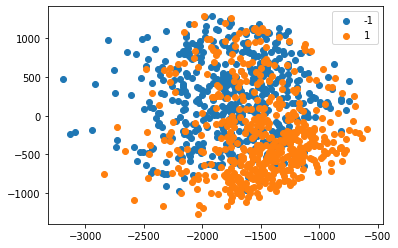

In [236]:
import matplotlib.pyplot as plt

lam, vp = np.linalg.eig(Xapp.T@Xapp)

lam_tries_arg = np.argsort(lam)
lam_2_max = np.sort(lam_tries_arg[-2:])
vp_2 = vp[:,lam_2_max]

Xapp_2D = Xapp@vp_2

plt.figure()
# for c in range(0,10):
#   Xc = Xapp_2D[Yapp==c]
#   plt.scatter(Xc[:,0],Xc[:,1])

Xc = Xapp_2D[Yapp==-1]
plt.scatter(Xc[:,0],Xc[:,1])
Xc = Xapp_2D[Yapp==1]
plt.scatter(Xc[:,0],Xc[:,1])

plt.legend([-1,1])

## Importation des données de la Base IADS multiclasses

In [155]:
iads_names_multi_df = pd.read_csv('Bases_IADS_multiclasses/names_multi.csv',sep=";")

In [156]:
iads_names_multi_df

,ident,A001,A002,A003,A004,A005,A006,A007,A008,A009,...,A776,A777,A778,A779,A780,A781,A782,A783,A784,label


In [157]:
iads_train_multi_df = pd.read_csv("Bases_IADS_multiclasses/train_multi.csv",sep=";",names=iads_names_multi_df.columns,header=None)
iads_test_multi_df  = pd.read_csv("Bases_IADS_multiclasses/test_multi.csv", sep=";",names=iads_names_multi_df.columns,header=None)
iads_eval_multi_df  = pd.read_csv("Bases_IADS_multiclasses/eval_multi.csv", sep=";",names=iads_names_multi_df.columns,header=None)

In [158]:
iads_multi_noms = [nom for nom in iads_names_multi_df.columns if nom != 'ident' and nom != 'label']

In [159]:
iads_train_multi_df[:5]

,ident,A001,A002,A003,A004,A005,A006,A007,A008,A009,...,A776,A777,A778,A779,A780,A781,A782,A783,A784,label
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
train_multi_desc,train_multi_label = np.array(iads_train_multi_df[iads_multi_noms]), np.array(iads_train_multi_df['label'])

train_multi_desc[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [161]:
np.unique(train_multi_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [162]:
test_multi_desc, test_multi_label = np.array(iads_test_multi_df[iads_noms]), np.array(iads_test_multi_df['label'])

print(test_multi_desc.shape,test_multi_label.shape)

(2000, 784) (2000,)


In [163]:
eval_multi_desc, eval_multi_label, eval_multi_ident = np.array(iads_eval_multi_df[iads_noms]), np.array(iads_eval_multi_df['label']), np.array(iads_eval_multi_df['ident'])

print(eval_multi_desc.shape,eval_multi_label.shape)

(2000, 784) (2000,)


## Test sur les différents classifieurs

In [225]:
# Juste un changement de notations non obligé, juste une habitude
Xapp_multi,Yapp_multi,Xtest_multi,Ytest_multi = train_multi_desc,train_multi_label,test_multi_desc,test_multi_label

### Classifieur KNN

Pour des valeurs de k entre 1 et 15, j'apprends sur les données train et puis j'évalue le model avec les données de test

In [259]:
# Attention l'execution prend beaucoup de temps
for k in range(1,15+1):
  cl_knn = ClassifierKNN(Xapp_multi.shape[1], k)
  cl_multi = ClassifierMultiOAA(cl_knn)
  cl_multi.train(Xapp_multi, Yapp_multi)
  
  tic= time.time()
  acc = cl_multi.accuracy(Xtest_multi, Ytest_multi)
  toc= time.time()

  print('  k=',k,'precision:',acc,'en',toc-tic,'secondes')

  k= 1 precision: 0.8925 en 395.40997314453125 secondes
  k= 2 precision: 0.8795 en 364.15876293182373 secondes
  k= 3 precision: 0.8955 en 360.78883600234985 secondes
  k= 4 precision: 0.8955 en 354.01795411109924 secondes
  k= 5 precision: 0.9025 en 360.4409878253937 secondes
  k= 6 precision: 0.8965 en 372.9161469936371 secondes
  k= 7 precision: 0.899 en 390.75980496406555 secondes
  k= 8 precision: 0.894 en 384.66838788986206 secondes
  k= 9 precision: 0.8925 en 375.9965491294861 secondes
  k= 10 precision: 0.89 en 373.9530532360077 secondes
  k= 11 precision: 0.8885 en 417.2010078430176 secondes
  k= 12 precision: 0.8895 en 412.9451730251312 secondes
  k= 13 precision: 0.887 en 425.782607793808 secondes
  k= 14 precision: 0.882 en 384.5070278644562 secondes
  k= 15 precision: 0.8825 en 382.8615131378174 secondes


Pour le classifieur k plus proches voisins, nous avons le meilleur taux de performance sur les données de test est obtenu avec k=5 pour 90.25% de bonne prédiction.

#### Validation croisée de knn avec k=5

In [166]:
index = np.random.permutation(len(Yapp_multi))
Xm = Xapp_multi[index]
Ym = Yapp_multi[index]
niter = 10
perf = []
temps = []

# ######################## Perceptron
for i in range(niter):
  Xa,Ya,Xt,Yt = crossval(Xm, Ym, niter, i)
  cl_knn = ClassifierKNN(Xa.shape[1], 5)
  cl_multi = ClassifierMultiOAA(cl_knn)
  cl_multi.train(Xapp_multi, Yapp_multi)
  
  tic= time.time()
  acc = cl_multi.accuracy(Xt, Yt)
  toc= time.time()

  temps.append(toc-tic)
  perf.append(acc)
# ######
print("Avec le classifier knn, k=5")
print("  Perf obtenues : ",analyse_perfs(perf))
print(f"Résultat en {(np.mean(temps)):.4} secondes en moyenne")

Avec le classifier knn, k=5
  Perf obtenues :  (0.9360000000000002, 0.00015399999999999916)
Résultat en 27.36 secondes en moyenne


### Classifieur Perceptron

In [169]:
perc = ClassifierPerceptron(Xapp_multi.shape[1], 1e-5)
cl_multi = ClassifierMultiOAA(perc)
tic= time.time()
cl_multi.train(Xapp_multi, Yapp_multi)
toc= time.time()

print('Perceptron')
print('  precision:',cl_multi.accuracy(Xtest_multi, Ytest_multi),'en',toc-tic,'secondes')

Perceptron
  precision: 0.8395 en 11.181117057800293 secondes


Le taux de performance de 83.3% pour des learning_rate entre [1e-5,1e-2].
Le classifieur perceptron est moins performant que celui des k plus proches voisins.

#### Validation croisée avec perceptron

In [167]:
index = np.random.permutation(len(Yapp_multi))
Xm = Xapp_multi[index]
Ym = Yapp_multi[index]
niter = 10
perf = []
temps = []

# ######################## Perceptron
for i in range(niter):
  Xa,Ya,Xt,Yt = crossval(Xm, Ym, niter, i)
  perc = ClassifierPerceptron(Xa.shape[1], 1e-5)
  cl_multi = ClassifierMultiOAA(perc)
  tic= time.time()
  cl_multi.train(Xa, Ya)
  toc= time.time()

  temps.append(toc-tic)
  perf.append(cl_multi.accuracy(Xt, Yt))
# ######
print("Avec le classifier Perceptron")
print("  Perf obtenues : ",analyse_perfs(perf))
print(f"Résultat en {(np.mean(temps)):.4} secondes en moyenne")

Avec le classifier Perceptron
  Perf obtenues :  (0.8324999999999999, 0.00034124999999999976)
Résultat en 4.173 secondes en moyenne


### Classifieur Perceptron biais

In [168]:
perc = ClassifierPerceptronBiais(Xapp_multi.shape[1], 1e-5)
cl_multi = ClassifierMultiOAA(perc)
tic= time.time()
cl_multi.train(Xapp_multi, Yapp_multi)
toc= time.time()

print('Perceptron Biais')
print('  precision:',cl_multi.accuracy(Xtest_multi, Ytest_multi),'en',toc-tic,'secondes')

Perceptron Biais
  precision: 0.833 en 10.927377223968506 secondes


Performance pareille que celle du perceptron classique.

In [170]:
index = np.random.permutation(len(Yapp_multi))
Xm = Xapp_multi[index]
Ym = Yapp_multi[index]
niter = 10
perf = []
temps = []

# ######################## Perceptron
for i in range(niter):
  Xa,Ya,Xt,Yt = crossval(Xm, Ym, niter, i)
  perc = ClassifierPerceptronBiais(Xa.shape[1], 1e-5)
  cl_multi = ClassifierMultiOAA(perc)
  tic= time.time()
  cl_multi.train(Xa, Ya)
  toc= time.time()

  temps.append(toc-tic)
  perf.append(cl_multi.accuracy(Xt, Yt))
# ######
print("Avec le classifier Perceptron biais")
print("  Perf obtenues : ",analyse_perfs(perf))
print(f"Résultat en {(np.mean(temps)):.4} secondes en moyenne")

Avec le classifier Perceptron biais
  Perf obtenues :  (0.8445, 0.0009572500000000001)
Résultat en 3.727 secondes en moyenne


### Classifieur Perceptron Kernel Bias

In [172]:
noyau = KernelBias(Xapp_multi.shape[1],Xapp_multi.shape[1]+1)

In [173]:
perc = ClassifierPerceptronKernel(Xapp_multi.shape[1], 1e-5,noyau)
cl_multi = ClassifierMultiOAA(perc)
tic= time.time()
cl_multi.train(Xapp_multi, Yapp_multi)
toc= time.time()

print('Perceptron Kernel')
print('  precision:',cl_multi.accuracy(Xtest_multi, Ytest_multi),'en',toc-tic,'secondes')

Perceptron Kernel
  precision: 0.831 en 11.917628288269043 secondes


In [174]:
index = np.random.permutation(len(Yapp_multi))
Xm = Xapp_multi[index]
Ym = Yapp_multi[index]
niter = 10
perf = []
temps = []

# ######################## Perceptron
for i in range(niter):
  Xa,Ya,Xt,Yt = crossval(Xm, Ym, niter, i)
  perc = ClassifierPerceptronKernel(Xa.shape[1], 1e-5,noyau)
  cl_multi = ClassifierMultiOAA(perc)
  tic= time.time()
  cl_multi.train(Xa, Ya)
  toc= time.time()

  temps.append(toc-tic)
  perf.append(cl_multi.accuracy(Xt, Yt))
# ######
print("Avec le classifier Perceptron kernel bias")
print("  Perf obtenues : ",analyse_perfs(perf))
print(f"Résultat en {(np.mean(temps)):.4} secondes en moyenne")

Avec le classifier Perceptron kernel bias
  Perf obtenues :  (0.836, 0.0007089999999999998)
Résultat en 4.346 secondes en moyenne


### Classifieur Perceptron Kernel Poly

In [176]:
# Seule la première dimension est intéressante
noyau = KernelPoly(Xapp_multi.shape[1],Xapp_multi.shape[1]+1)

In [111]:
# Il est impraticable il me prend trop de temps, plus d'une heure
perc = ClassifierPerceptronKernel(Xapp_multi.shape[1], 1e-5,noyau)
cl_multi = ClassifierMultiOAA(perc)
tic= time.time()
cl_multi.train(Xapp_multi, Yapp_multi)
toc= time.time()

print('Perceptron Kernel')
print('  precision:',cl_multi.accuracy(Xtest_multi, Ytest_multi),'en',toc-tic,'secondes')

### Choix du classifieur des k plus proches voisins avec k=5.

Le classifieur des k plus proches voisins offre les meilleurs performances que tous les autres classifieurs étudiés ici.

In [175]:
# Attention l'execution prend un peu de temps 3m36 chez moi
cl_knn = ClassifierKNN(Xapp_multi.shape[1],5)
cl_multi = ClassifierMultiOAA(cl_knn)
cl_multi.train(Xapp_multi,Yapp_multi)

for i in range(0,eval_desc.shape[0]):
  eval_multi_label[i] = cl_multi.predict(eval_multi_desc[i])  # prediction de chaque xi

In [59]:
eval_multi_df = pd.DataFrame({'ident':eval_multi_ident,'label':eval_multi_label})
eval_multi_df[:5]

# Fichier csv à rendre
eval_multi_df.to_csv('Bases_IADS_multiclasses/eval_multi-Mbaye.csv',sep=";",index=False,header=False)

### Réduction de dimensionnalité

/usr/local/lib/python3.9/site-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


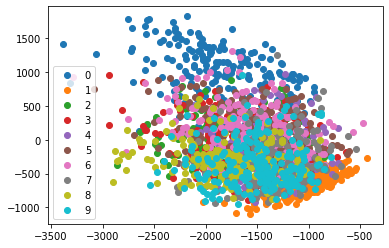

In [235]:
import matplotlib.pyplot as plt

lam, vp = np.linalg.eig(Xapp_multi.T@Xapp_multi)

lam_tries_arg = np.argsort(lam)
lam_2_max = np.sort(lam_tries_arg[-2:])
vp_2 = vp[:,lam_2_max]

Xapp_2D = Xapp_multi@vp_2

plt.figure()
for c in range(0,10):
  Xc = Xapp_2D[Yapp_multi==c]
  plt.scatter(Xc[:,0],Xc[:,1])


plt.legend(np.arange(10))